In [1]:
import time
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from keras.utils import np_utils

import numpy as np
import csv
import os

/home/shashwati/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load training dataset
dataset = np.genfromtxt("YearPredictionMSD.csv", dtype='float', delimiter=",")

In [3]:
# split into input (X) and output (Y) variables
train_X = dataset[0:463715,1:91]
train_Y = dataset[0:463715,0]

test_X = dataset[463715:,1:91]
test_Y = dataset[463715:,0]
print("Done!")

Done!


In [4]:
# making the regression tree of depth 13
start = time.time()
dt = DecisionTreeRegressor(max_depth=13, min_samples_leaf=5000)
dt.fit(train_X, train_Y)

end = time.time()
print("Training time: ", round(end - start, 5))

Training time:  32.76943


In [5]:
# returns the mae and mse given test file
pred = dt.predict(test_X)
    
print(mean_absolute_error(test_Y,  pred), mean_squared_error(test_Y, pred))

7.09472886101264 98.06043047875973


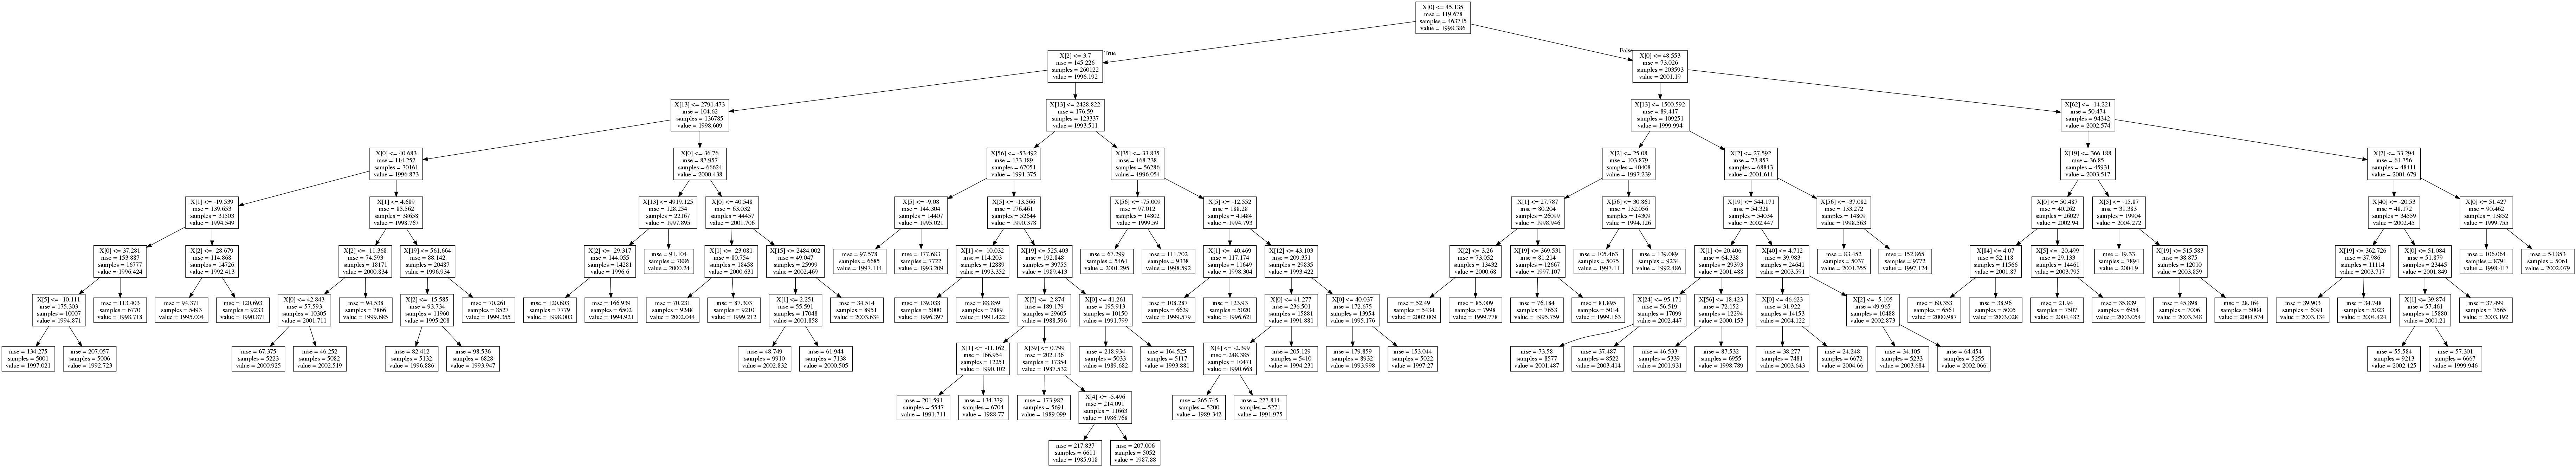

In [6]:
# Decision tree visualization
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())